# Project Check-in 5

**Clustering:**
- Code: is shown below alongside graphs/plots
- Quantitative Metrics to evaluate clustering
  - We created a clustering using both Hierarchical and K-Means. For each of these we tested various methods of normalization and k values to reach a clustering that informed us the most about our data.
  - Out final models had the following metrics
    - Silhouette Score for K-Means 0.1249274056780295
    - Silhouette Score for H-Clustering 0.10101739209808032
    - Rand Score 0.8621218471269019
    - Adjusted Rand Score 0.7242411396957116
- How you determined the number of clusters for your data and why
  - We used WCSS (Within-Cluster Sum of Squares) method to determine the best k value, this measures the total variance within each cluster
  - We ran the k-means algorithm for k values between 1 and 10, and plotted each of their WCSS values
  - Now can lookfor some elbow point, where there is a much smaller marginal benefit of increasing the number of clusters
  - The elbow for our current normalization was obserbed with 2 clusters, which also provided clarity to inform us the most about our data
  - Note: For other methods of normalization such as normalizing all variables, we observed elbows at 3 and 4, however they provided worse silhoutte scores and didn't present a clear story to better interpret the data.
- Explain how clustering helped you learn about the structure of data for your project.
  - The clustering, more specifically the K-means clustering that we performed helped describe two different archetypes of students that we have in our data. Although the silhoutte values are very modest as the clustering isn't perfect, partially due to many features that may not have a large impact on the score, or missing features that drive a stronger relationship
  - However, from observing the means from each of the two clusters we witness a higher dedication/time commitment group that studies longer, attends more class, and performs better on the exam. This group also tends to be more privallaged, having more tutoring sessions, parent involvement, closer to the school, etc. In fact, every feature that you would expect to be more apparent in this group, appears at a higher value than the other cluster. The other cluster has lower values for all these features, as well as a lower exam score


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

complete_data = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [43]:
# Clean the data by removing rows with empty values
columns_to_drop = ["Extracurricular_Activities", "Peer_Influence", "Physical_Activity", "Gender"]
data = complete_data.drop(columns=columns_to_drop)
data = data.dropna()
data.isna().sum()
# Convert categorical columns to numerical to support clustering using euclidean (as shown in k-means)
# Convert low medium and high to 0, 1, 2
data['Parental_Involvement'] = data['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Access_to_Resources'] = data['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Motivation_Level'] = data['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Family_Income'] = data['Family_Income'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Teacher_Quality'] = data['Teacher_Quality'].map({'Low': 1, 'Medium': 2, 'High': 3})
# Convert "Yes" to 1 and "No" to 0
data['Learning_Disabilities'] = data['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
data['Internet_Access'] = data['Internet_Access'].map({'Yes': 1, 'No': 0})
# Convert Parental Education
data['Parental_Education_Level'] = data['Parental_Education_Level'].map({
    'High School': 1,
    'College': 2,
    'Postgraduate': 3
})
# Convert School Type
data['School_Type'] = data['School_Type'].map({'Private': 1, 'Public': 0})
# Convert Distance From Home
data['Distance_from_Home'] = data['Distance_from_Home'].map({
    'Near': 1,
    'Moderate': 2,
    'Far': 3
})

pca_data = data.copy()
data.sample(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
943,19,89,1,2,8,71,2,1,2,1,3,0,0,1,1,68
5600,19,63,3,2,6,98,3,1,4,3,2,1,0,3,1,69
650,31,66,1,3,8,80,1,1,0,1,1,1,0,1,1,65
5410,17,96,2,2,9,93,1,1,3,2,2,1,0,1,3,69
3908,24,64,2,1,6,85,2,1,3,2,2,0,0,3,2,65
2159,23,66,3,1,8,63,2,1,0,1,2,0,0,2,1,64
4505,22,64,1,2,8,91,1,1,0,1,2,0,0,2,2,63
4376,6,85,3,2,9,70,3,1,0,1,2,0,1,3,1,64
2737,22,76,2,2,8,59,2,1,1,1,2,0,0,2,1,66
4931,7,74,2,2,6,66,1,1,1,1,3,1,0,1,1,61


In [5]:
# Normalize the data
exclude_columns = ['Exam_Score', 'Hours_Studied', 'Attendance',]
data.loc[:, ~data.columns.isin(exclude_columns)] = data.loc[:, ~data.columns.isin(exclude_columns)].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)
data.sample(10)

<ipython-input-5-e186eb66513f>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.  0.  0.5 ... 0.5 1.  0.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, ~data.columns.isin(exclude_columns)] = data.loc[:, ~data.columns.isin(exclude_columns)].apply(
<ipython-input-5-e186eb66513f>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.  0.5 0.5 ... 0.  1.  0. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, ~data.columns.isin(exclude_columns)] = data.loc[:, ~data.columns.isin(exclude_columns)].apply(
<ipython-input-5-e186eb66513f>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5        0.66666667 0.5        ... 0.33333333 0.33333333 0.83333333]' has dtype incompa

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
5638,18,63,1.0,1.0,0.666667,0.64,0.5,1,0.125,1.0,0.5,1,0,0.0,0.0,64
4982,22,61,1.0,0.5,0.500000,0.60,1.0,1,0.375,0.5,1.0,0,0,1.0,0.5,67
4162,18,72,0.5,0.5,0.666667,0.42,0.0,1,0.250,1.0,0.5,0,0,1.0,0.0,66
467,25,63,1.0,0.5,0.500000,0.38,0.5,1,0.000,0.0,1.0,1,0,0.0,0.5,64
5910,23,66,0.5,0.5,0.333333,0.60,0.5,1,0.125,0.5,0.5,0,0,0.5,0.0,66
5668,10,76,0.5,0.0,0.500000,0.58,0.0,1,0.375,0.5,0.5,1,0,0.0,1.0,62
5684,17,66,0.5,0.5,0.666667,0.66,0.5,1,0.500,0.5,1.0,1,0,0.0,0.5,65
4274,8,78,1.0,1.0,0.500000,0.88,0.0,1,0.125,1.0,1.0,0,1,0.0,0.0,65
6126,27,80,1.0,0.5,0.666667,0.80,0.0,1,0.125,0.5,1.0,0,0,1.0,0.0,71
3799,14,77,0.0,0.0,0.500000,0.98,0.0,1,0.250,0.5,0.5,0,0,1.0,0.5,64


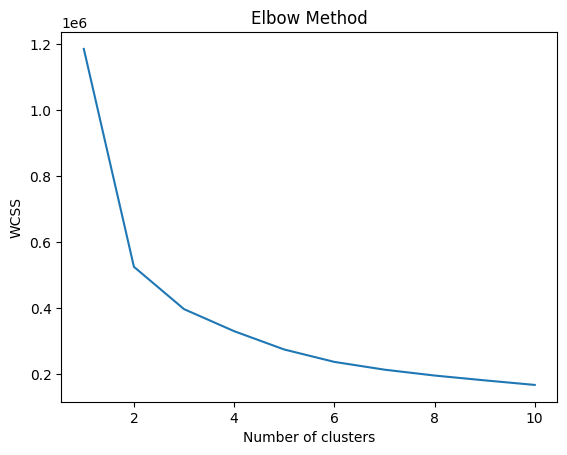

In [9]:
# Determine how many clusters to use based on elbow point
wcss = []

# Test a range of cluster numbers (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Apply K-Means Clustering
ss = StandardScaler()
data_ss = ss.fit_transform(data)
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(data_ss)
kmeans.cluster_centers_

array([[ 0.31627969,  0.73061523,  0.08308013,  0.13310946, -0.00962629,
         0.11599741,  0.03722498,  0.03487318,  0.11423012,  0.05116142,
         0.0652249 ,  0.01026688, -0.08825067,  0.09019777, -0.07615175,
         0.74787525,  1.05315098],
       [-0.28516093, -0.65873001, -0.07490588, -0.12001282,  0.00867916,
        -0.10458443, -0.03356241, -0.031442  , -0.10299102, -0.04612765,
        -0.05880743, -0.00925672,  0.07956769, -0.08132321,  0.06865918,
        -0.67429182, -0.94953147]])

In [15]:
# See means for each cluster
data['Cluster'] = kmeans.labels_

# Group data by clusters and calculate the mean for each feature
cluster_summary = data.groupby('Cluster').mean()

print(cluster_summary)

         Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
Cluster                                                                         
0            21.870040   88.459325              0.571594             0.595569   
1            18.270423   72.412642              0.516696             0.507156   

         Sleep_Hours  Previous_Scores  Motivation_Level  Internet_Access  \
Cluster                                                                    
0           0.503472         0.534729          0.466931         0.933201   
1           0.507951         0.471205          0.442308         0.915623   

         Tutoring_Sessions  Family_Income  Teacher_Quality  School_Type  \
Cluster                                                                   
0                 0.204530       0.413029         0.618221     0.309524   
1                 0.171027       0.376863         0.580948     0.300537   

         Learning_Disabilities  Parental_Education_Level  Distance_fr

<ipython-input-34-7de4fc4b24fe>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(cluster_0_center[0], cluster_0_center[1], color='black', marker='x', s=200, label='Cluster 0 Center')
<ipython-input-34-7de4fc4b24fe>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(cluster_1_center[0], cluster_1_center[1], color='black', marker='x', s=200, label='Cluster 1 Center')


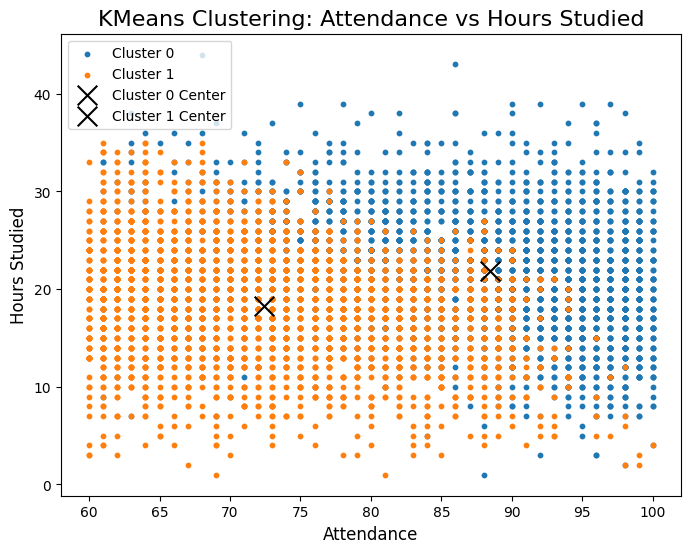

Cluster
0    70.179233
1    64.612999
Name: Exam_Score, dtype: float64
Cluster
0    21.870040
1    18.270423
Name: Hours_Studied, dtype: float64
Cluster
0    88.459325
1    72.412642
Name: Attendance, dtype: float64


In [34]:
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot the data points, coloring by the cluster label
for cluster in range(2):  # Assuming n_clusters=2
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Attendance'], cluster_data['Hours_Studied'],
                label=f'Cluster {cluster}', s=10)

cluster_0_center = cluster_summary.loc[0, ['Attendance', 'Hours_Studied']]
cluster_1_center = cluster_summary.loc[1, ['Attendance', 'Hours_Studied']]

plt.scatter(cluster_0_center[0], cluster_0_center[1], color='black', marker='x', s=200, label='Cluster 0 Center')
plt.scatter(cluster_1_center[0], cluster_1_center[1], color='black', marker='x', s=200, label='Cluster 1 Center')


# Adding labels and title
plt.title('KMeans Clustering: Attendance vs Hours Studied', fontsize=16)
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Hours Studied', fontsize=12)

# Display the legend and plot
plt.legend()
plt.show()

print(cluster_summary['Exam_Score'])
print(cluster_summary['Hours_Studied'])
print(cluster_summary['Attendance'])

In [35]:
# Hieirarchal Clustering
hclust = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
data_hclust = hclust.fit(data_ss)
data_hclust_labels = data_hclust.labels_

In [36]:
# Add cluster labels to the DataFrame
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = data_hclust_labels

# Calculate the mean for each feature grouped by clusters
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Print the cluster means
print(cluster_means)

         Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
Cluster                                                                         
0            18.712540   74.369022              0.522582             0.520457   
1            21.798011   88.159143              0.571729             0.590283   

         Sleep_Hours  Previous_Scores  Motivation_Level  Internet_Access  \
Cluster                                                                    
0           0.509830         0.481738          0.444208         0.872476   
1           0.500064         0.529526          0.468057         0.998087   

         Tutoring_Sessions  Family_Income  Teacher_Quality  School_Type  \
Cluster                                                                   
0                 0.175844       0.378587         0.585282     0.298618   
1                 0.202850       0.416220         0.617827     0.313695   

         Learning_Disabilities  Parental_Education_Level  Distance_fr

<ipython-input-38-11d19f2bb5e2>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(cluster_0_center[0], cluster_0_center[1], color='black', marker='x', s=200, label='Cluster 0 Center')
<ipython-input-38-11d19f2bb5e2>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(cluster_1_center[0], cluster_1_center[1], color='black', marker='x', s=200, label='Cluster 1 Center')


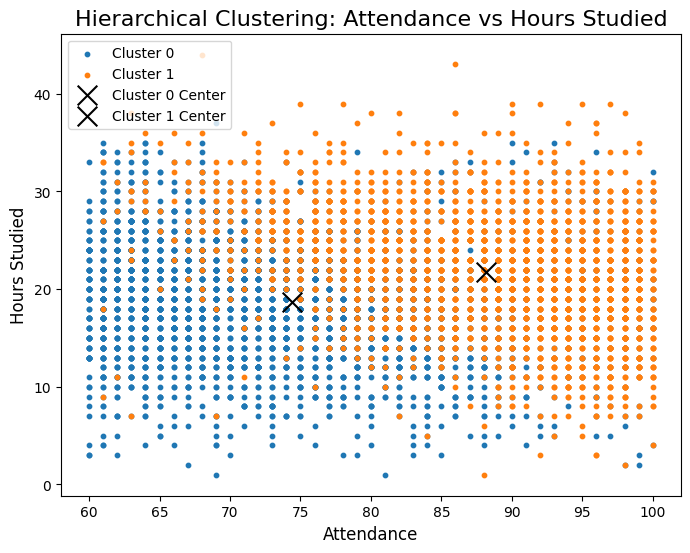

Cluster
0    65.165515
1    70.256695
Name: Exam_Score, dtype: float64
Cluster
0    74.369022
1    88.159143
Name: Attendance, dtype: float64
Cluster
0    18.712540
1    21.798011
Name: Hours_Studied, dtype: float64


In [38]:
# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot the data points, coloring by the cluster label
for cluster in range(2):  # Assuming n_clusters=2
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    plt.scatter(cluster_data['Attendance'], cluster_data['Hours_Studied'],
                label=f'Cluster {cluster}', s=10)

# Plot the cluster centers (mean of Attendance and Hours_Studied for each cluster)
cluster_0_center = cluster_means.loc[0, ['Attendance', 'Hours_Studied']]
cluster_1_center = cluster_means.loc[1, ['Attendance', 'Hours_Studied']]

plt.scatter(cluster_0_center[0], cluster_0_center[1], color='black', marker='x', s=200, label='Cluster 0 Center')
plt.scatter(cluster_1_center[0], cluster_1_center[1], color='black', marker='x', s=200, label='Cluster 1 Center')

# Adding labels and title
plt.title('Hierarchical Clustering: Attendance vs Hours Studied', fontsize=16)
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Hours Studied', fontsize=12)

# Display the legend and plot
plt.legend()
plt.show()

# Print the cluster summary
print(cluster_means['Exam_Score'])
print(cluster_means['Attendance'])
print(cluster_means['Hours_Studied'])

In [ ]:
#Importing metric libraries
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

In [ ]:
#K-means inertia
# from sklearn
# inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
round(kmeans.inertia_, 1)

#silhouette score for k-means
print("Silhouette Score for K-Means", silhouette_score(data_ss, y_kmeans))

#silhouette score for hclust
print("Silhouette Score for H-Clustering", silhouette_score(data_ss, data_hclust_labels))

#Comparing how much clusters agree
print("Rand Score", rand_score(y_kmeans, data_hclust_labels))

#Comparing how much clusters agree
print("Adjusted Rand Score", adjusted_rand_score(y_kmeans, data_hclust_labels))

Silhouette Score for K-Means 0.1249274056780295
Silhouette Score for H-Clustering 0.10101739209808032
Rand Score 0.8621218471269019
Adjusted Rand Score 0.7242411396957116


# PCA for Variable Selection
Since we want the simplicity of regular linear regression, we will not be training any models on a PCA transformed dataset. However in order to achieve our goal of feature importance


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'data' is your DataFrame

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_data)

# Step 2: Perform PCA
pca = PCA(n_components=4)  # You can adjust the number of components if needed
pca.fit(data_scaled)

# Step 3: Get the loadings (component vectors)
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=data.columns)

# Print the loadings (feature importance)
print("Variable Loadings:")
print(loadings_df)

# Optionally, you can also print the explained variance ratio to see how much variance each principal component explains
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


Variable Loadings:
                               PC1       PC2       PC3       PC4
Hours_Studied             0.375064  0.295221  0.346147 -0.255867
Attendance                0.496840 -0.272497 -0.236558  0.026318
Parental_Involvement      0.112785 -0.393908  0.318914  0.003126
Access_to_Resources       0.132309  0.373313 -0.380240 -0.103230
Sleep_Hours              -0.029642 -0.080711  0.299406 -0.324081
Previous_Scores           0.145787  0.513482  0.012448  0.034082
Motivation_Level          0.069313  0.240493  0.058872  0.304757
Internet_Access           0.032786  0.073315  0.495728  0.010779
Tutoring_Sessions         0.134213 -0.211378 -0.047318  0.383936
Family_Income             0.073358 -0.088454  0.160298  0.413736
Teacher_Quality           0.057191 -0.208629  0.174427 -0.235482
School_Type               0.024584 -0.202835 -0.311296 -0.346879
Learning_Disabilities    -0.089033 -0.054355  0.188857  0.145695
Parental_Education_Level  0.099185 -0.241299 -0.169049 -0.227147
Distan

**PCA Conclusion**
From the above variable loadings we can see how hours studied and attendance have some of the strongest weights in PCA analysis. Additionally the feature Access to resources is relatively large where its correlation with exam score was previously low, meaning this feature could provide some underlying trends about the data that could be explored in future analysis. Additionally the Exam Score has a strong coefficient which make sense, as the exam score is the key value we wish to predict in our other supervised learning methods. Its high variable loading magnitude may prove how its a strong variable to predict since it can describe a lot of the variance in the data.
